# Import data

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [180]:
df = pd.read_csv("Drugs_dataset.csv")

In [181]:
df1=df.copy()

# EDA

## Numerical

In [182]:
df.head(5)

,Sodium,Tyramine,Potassium,Fiber,Sugar,Vit K,Vit C,Protein,Calcium,Drug,Interaction
0,120,0.5,350,2.5,5.0,550.0,45.0,12.0,120.0,Warfarin,Major
1,50,0.0,100,1.0,2.0,10.0,5.0,5.0,20.0,Warfarin,NaN
2,2300,1.0,400,3.0,15.0,25.0,10.0,20.0,50.0,Warfarin,NaN
3,150,0.2,200,4.5,8.0,120.0,60.0,8.0,80.0,Warfarin,Minor
4,80,0.0,150,0.5,0.0,5.0,2.0,15.0,30.0,Warfarin,NaN


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sodium       380 non-null    int64  
 1   Tyramine     380 non-null    float64
 2   Potassium    380 non-null    int64  
 3   Fiber        380 non-null    float64
 4   Sugar        380 non-null    float64
 5   Vit K        380 non-null    float64
 6   Vit C        380 non-null    float64
 7   Protein      380 non-null    float64
 8   Calcium      380 non-null    float64
 9   Drug         380 non-null    object 
 10  Interaction  202 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 32.8+ KB


interaction null means none so needs to be fixed  

drugs and interaction needs to be label encoded

In [184]:
df.describe()

,Sodium,Tyramine,Potassium,Fiber,Sugar,Vit K,Vit C,Protein,Calcium
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,520.571053,2.179737,386.142105,3.931579,11.826579,62.779737,26.834737,18.172368,109.975789
std,628.052409,6.443731,291.164337,4.259523,9.267918,113.863229,38.837149,11.695330,106.304402
min,10.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
25%,110.000000,0.000000,200.000000,1.500000,5.000000,14.750000,5.925000,9.150000,48.000000
50%,275.000000,0.000000,320.000000,2.700000,10.000000,29.000000,15.000000,16.000000,84.500000
75%,630.000000,1.100000,480.000000,4.500000,17.000000,55.000000,30.000000,25.000000,128.250000
max,2850.000000,46.000000,1700.000000,25.000000,55.000000,820.000000,275.000000,66.000000,660.000000


data needs scaling because different values have different max

## Visualizations

### Distributions

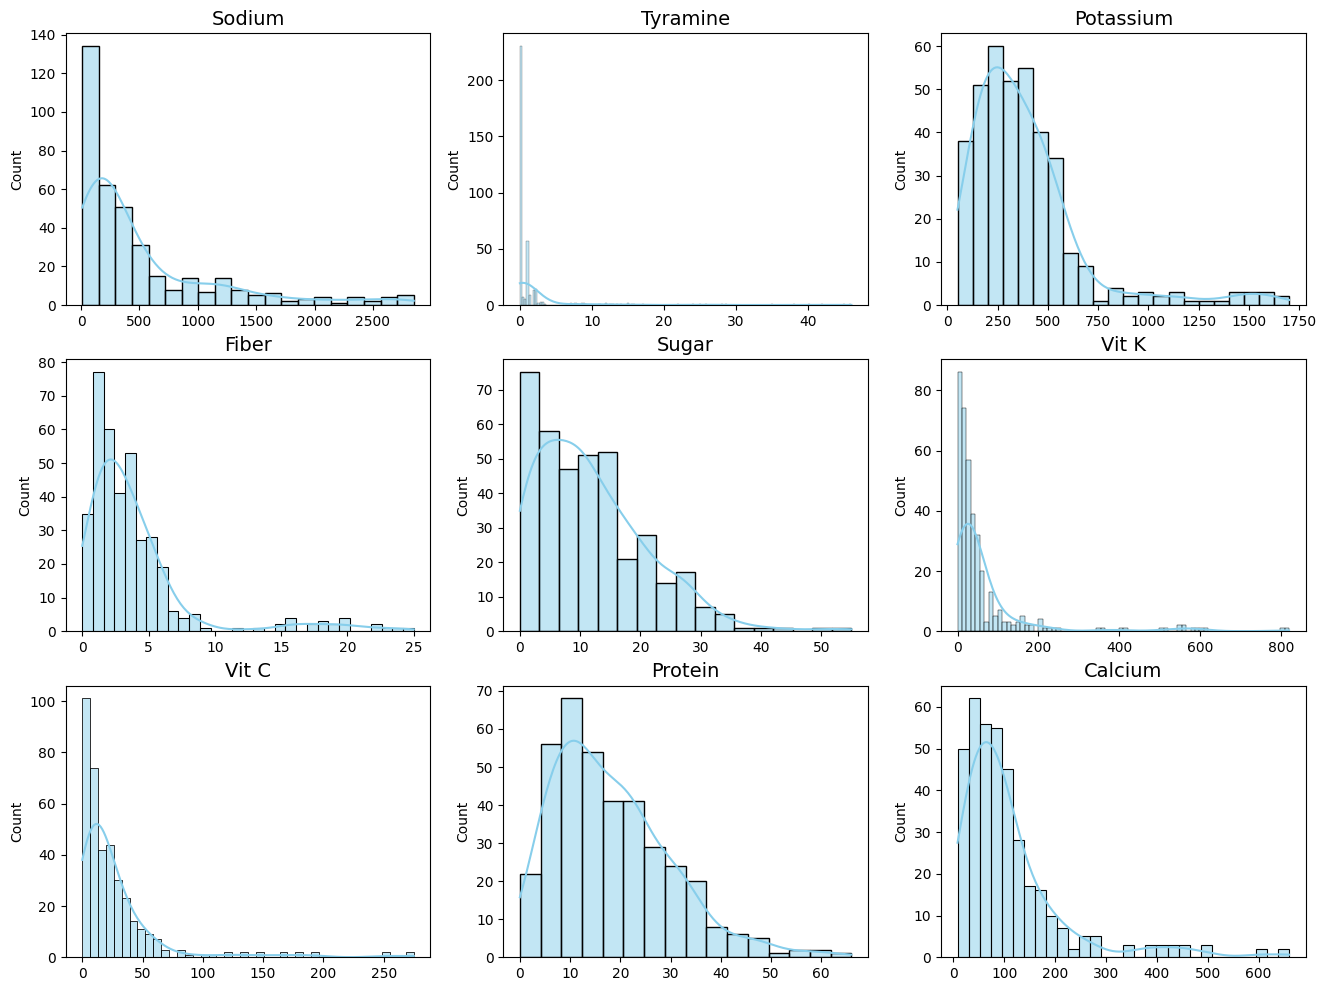

In [185]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(df.columns[:-2]):
    if col in df.columns:
        sns.histplot(data=df, x=col, kde=True, ax=axes[i], color='skyblue', edgecolor='black')
        axes[i].set_title(col, fontsize=14)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Count')
plt.show()

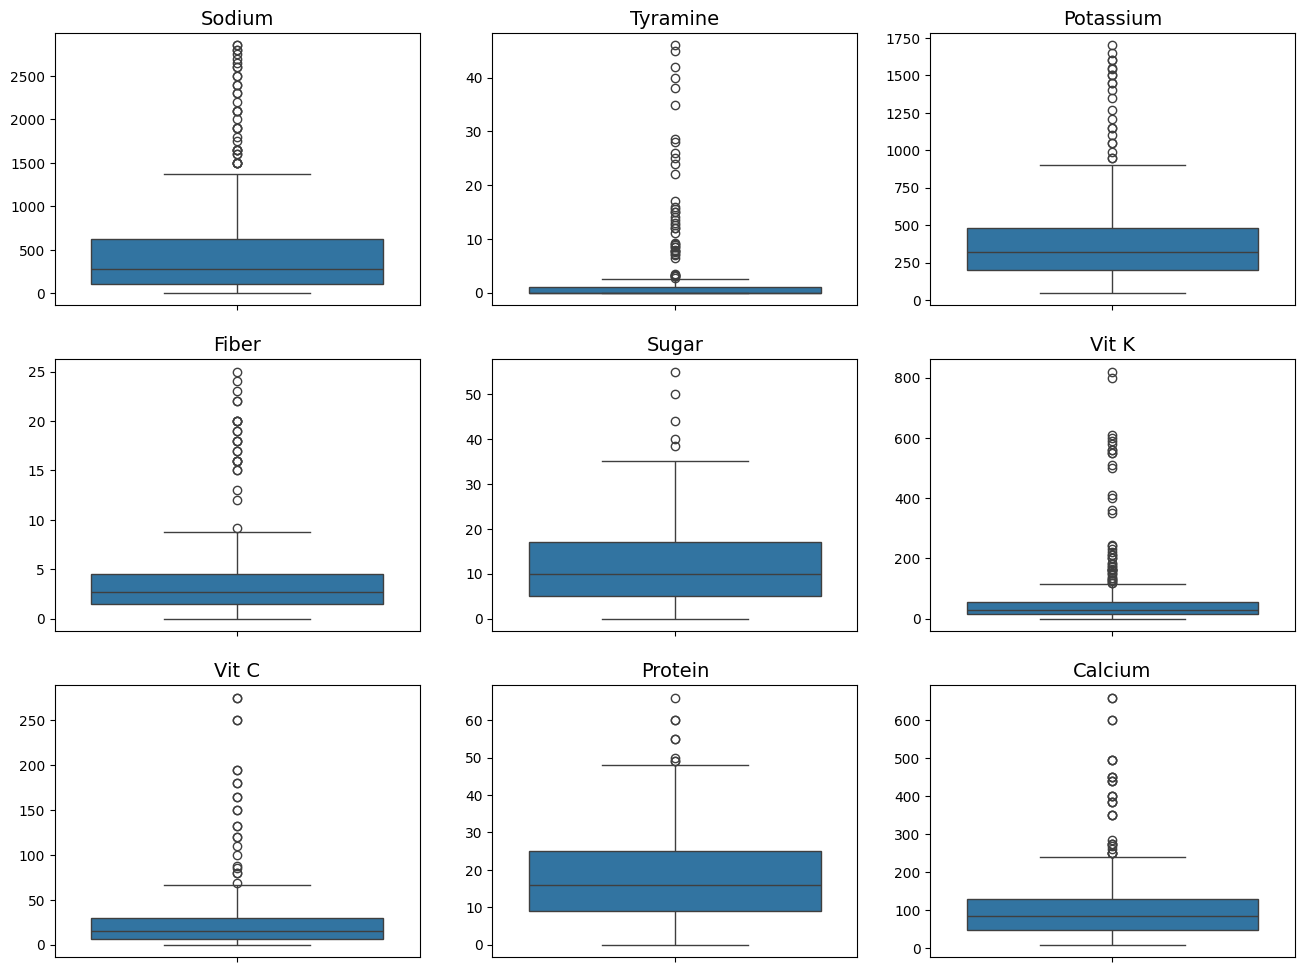

In [186]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.flatten()
for i, col in enumerate(df.columns[:-2]):
    if i < len(axes):
        sns.boxplot(data=df, y=col, ax=axes[i])
        axes[i].set_title(col, fontsize=14)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
plt.show()

All the data is right skewed, many outliers might need to test robust scaling, or fix skewness but data is too little to remove outliers

### Relationships

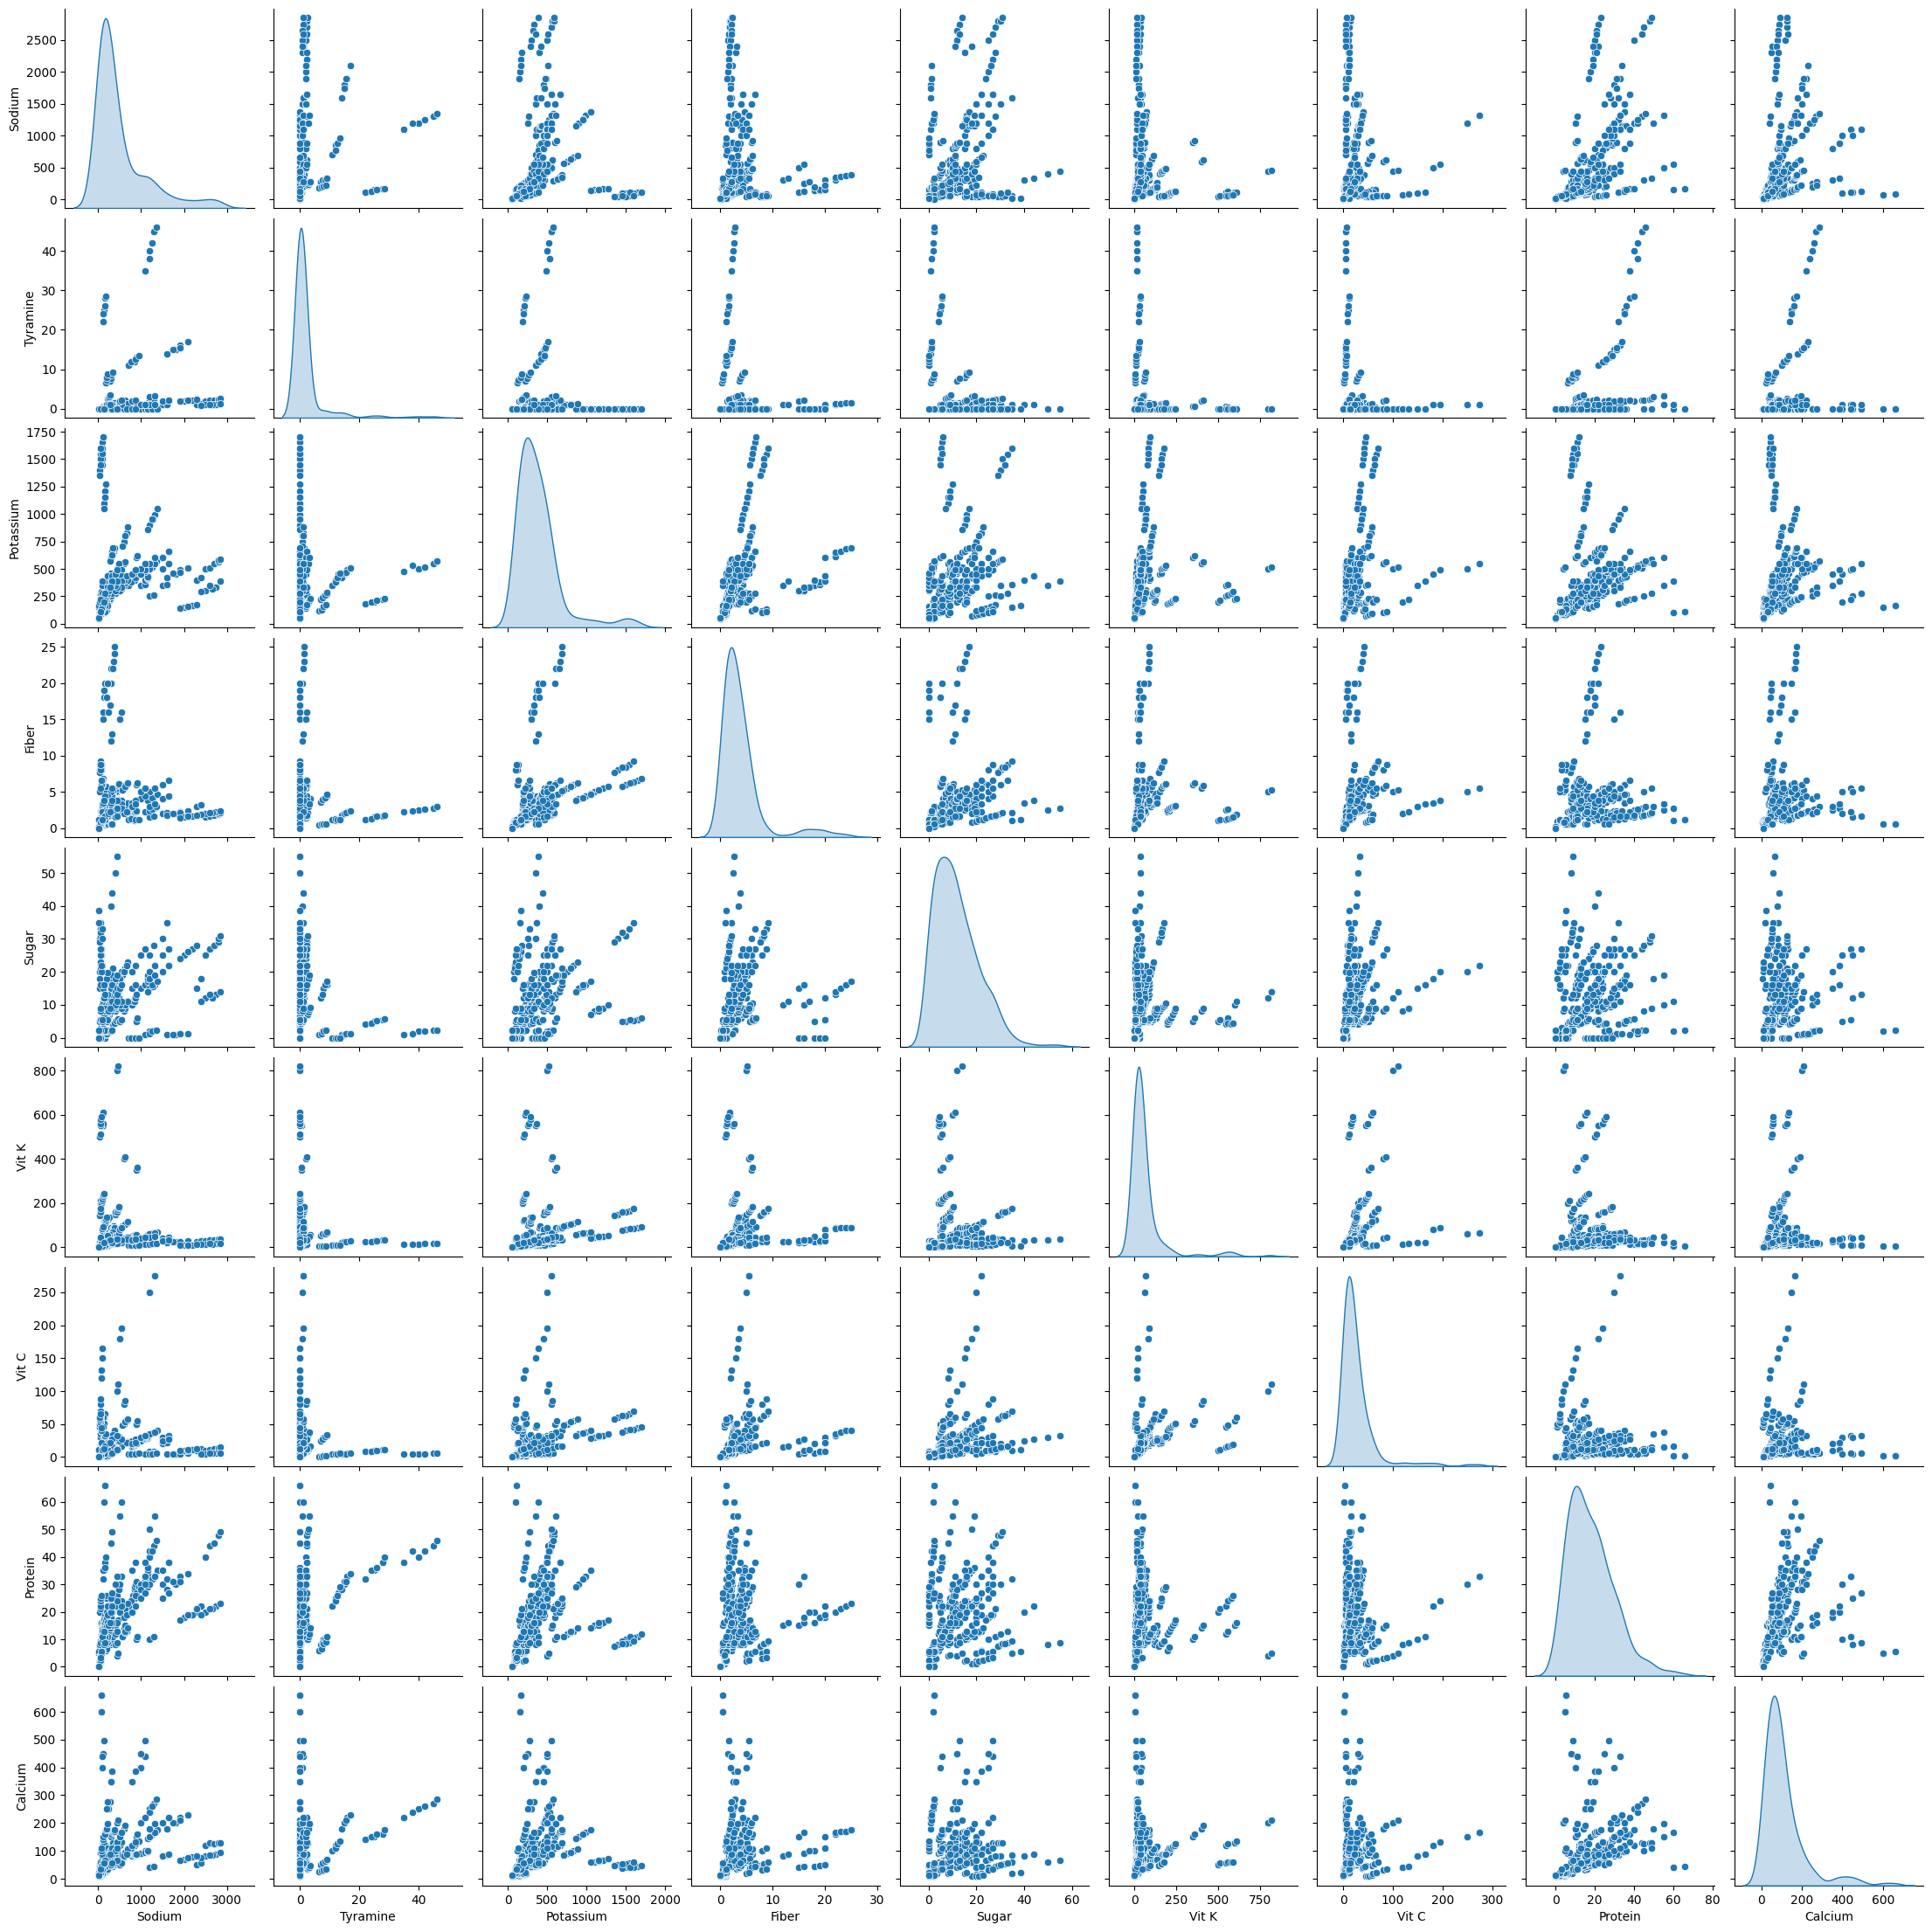

In [187]:
sns.pairplot(
    df,
    kind='scatter',
    diag_kind='kde',
)
plt.show()

Data Variables doesn't seem to hav much of a relationship

### Correlations

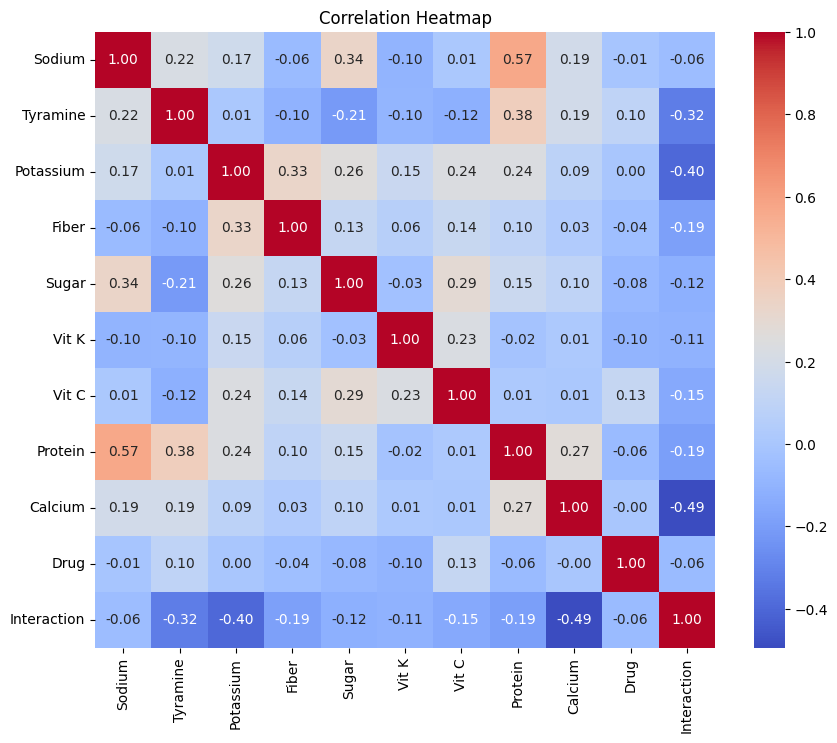

In [188]:
df_copy = df.copy()
categorical_cols = df_copy.select_dtypes(include=['object', 'category']).columns
le = LabelEncoder()
for col in categorical_cols:
    df_copy[col] = le.fit_transform(df_copy[col])
corr = df_copy.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

Protein and sodium have the highest correlation and also tyramine and Protein also fiber and potasium with label most correlated is calcium, potassium, tyramine

highest correlation with label is low we might need to do feature engineering to have a higher correlation

### Sampling Check

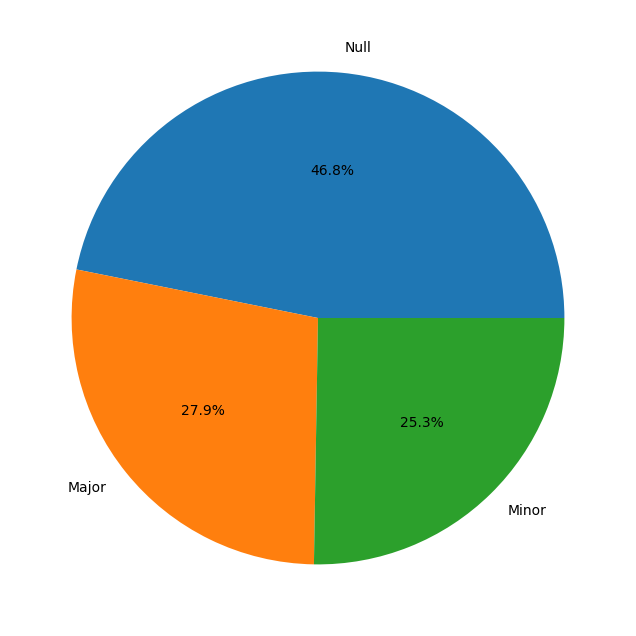

In [189]:
interaction_counts = df["Interaction"].fillna("Null").value_counts()
plt.figure(figsize=(8, 8))
plt.pie(interaction_counts, labels=interaction_counts.index, autopct='%1.1f%%')
plt.show()

In [190]:
df["Interaction"].fillna("Null").value_counts()

,count
Interaction,
Null,178
Major,106
Minor,96


The dataset is imbalanced, with no interactions being the most common which reflect real world distribution. We may apply sampling techniques on the training for this imbalance but we will keep the test set unchanged for realistic evaluation.

### Drug Count

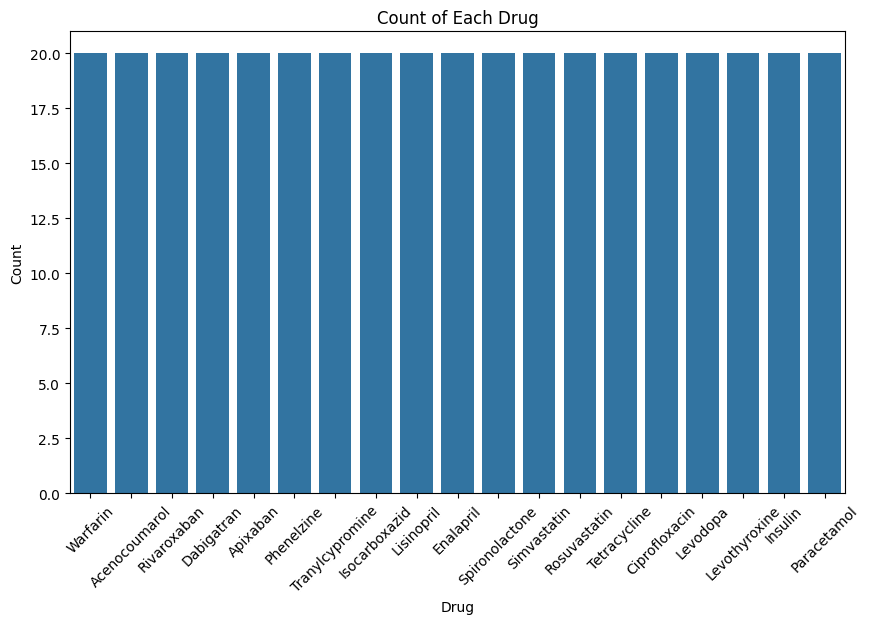

In [191]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Drug", order=df["Drug"].value_counts().index)
plt.title("Count of Each Drug")
plt.xlabel("Drug")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [192]:
df["Drug"].value_counts()

,count
Drug,
Warfarin,20
Acenocoumarol,20
Rivaroxaban,20
Dabigatran,20
Apixaban,20
Phenelzine,20
Tranylcypromine,20
Isocarboxazid,20
Lisinopril,20


All drugs seems to be the same amount

# Preprocessing

### Missing Values

In [193]:
df.isna().sum()

,0
Sodium,0
Tyramine,0
Potassium,0
Fiber,0
Sugar,0
Vit K,0
Vit C,0
Protein,0
Calcium,0
Drug,0


In [194]:
df["Interaction"]=df["Interaction"].fillna("None")

In [195]:
df["Interaction"].value_counts()

,count
Interaction,
None,178
Major,106
Minor,96


###  Encoding

In [196]:
def map_interaction(label):
    mapping = {
        "None": 0,
        "Minor": 1,
        "Major": 2
    }
    return mapping[label]


In [197]:
df["Interaction"] = df["Interaction"].apply(map_interaction)

In [198]:
drug_target_encoding = (
    df.groupby("Drug")["Interaction"]
    .mean()
    .to_dict()
)
df["Drug"] = df["Drug"].map(drug_target_encoding)


In [199]:
df.head()

,Sodium,Tyramine,Potassium,Fiber,Sugar,Vit K,Vit C,Protein,Calcium,Drug,Interaction
0,120,0.5,350,2.5,5.0,550.0,45.0,12.0,120.0,0.8,2
1,50,0.0,100,1.0,2.0,10.0,5.0,5.0,20.0,0.8,0
2,2300,1.0,400,3.0,15.0,25.0,10.0,20.0,50.0,0.8,0
3,150,0.2,200,4.5,8.0,120.0,60.0,8.0,80.0,0.8,1
4,80,0.0,150,0.5,0.0,5.0,2.0,15.0,30.0,0.8,0


### Fix Skewing

In [200]:
cols_to_transform = df.columns[:-2]
df[cols_to_transform] = np.log1p(df[cols_to_transform])

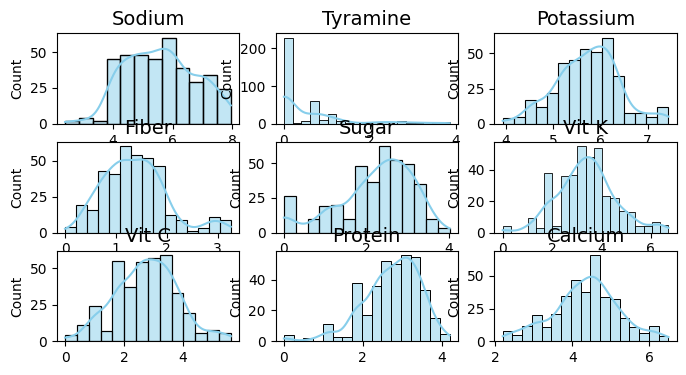

In [201]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 4))
axes = axes.flatten()

for i, col in enumerate(df.columns[:-2]):
    if col in df.columns:
        sns.histplot(data=df, x=col, kde=True, ax=axes[i], color='skyblue', edgecolor='black')
        axes[i].set_title(col, fontsize=14)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Count')
plt.show()

### Feuture engineering

In [202]:
#df['HighSugarLowVitamin'] = (
 #   (df["Sugar"] > df["Sugar"].quantile(0.5)).astype(int) *
 #   ((df["Vit K"] + df["Vit C"]) < (df["Vit K"] + df["Vit C"]).quantile(0.5)).astype(int)
#)

In [203]:
df['LowSugarHighFiber'] = (
    (df['Sugar'] < df['Sugar'].quantile(0.4)).astype(int) *
    (df['Fiber'] > df['Fiber'].quantile(0.6)).astype(int)
)

In [204]:
df['HighVitaminC'] = (df['Vit C'] > df['Vit C'].quantile(0.7)).astype(int)
df["CalciumPotassiumSodiumIndex"] = df["Calcium"] * df["Potassium"] / (df["Sodium"] + 1e-4)

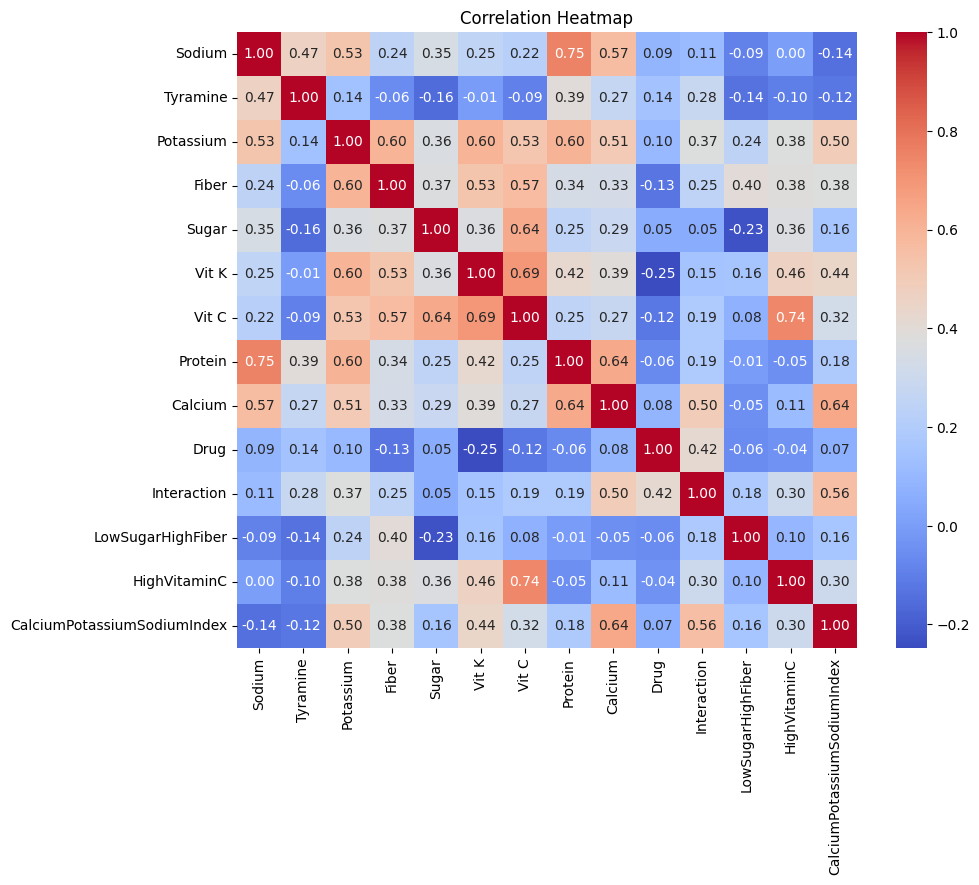

In [205]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [206]:
df.head()

,Sodium,Tyramine,Potassium,Fiber,Sugar,Vit K,Vit C,Protein,Calcium,Drug,Interaction,LowSugarHighFiber,HighVitaminC,CalciumPotassiumSodiumIndex
0,4.795791,0.405465,5.860786,1.252763,1.791759,6.311735,3.828641,2.564949,4.795791,0.8,2,0,1,5.860664
1,3.931826,0.000000,4.615121,0.693147,1.098612,2.397895,1.791759,1.791759,3.044522,0.8,0,0,0,3.573526
2,7.741099,0.693147,5.993961,1.386294,2.772589,3.258097,2.397895,3.044522,3.931826,0.8,0,0,0,3.044388
3,5.017280,0.182322,5.303305,1.704748,2.197225,4.795791,4.110874,2.197225,4.394449,0.8,1,0,1,4.644875
4,4.394449,0.000000,5.017280,0.405465,0.000000,1.791759,1.098612,2.772589,3.433987,0.8,0,0,0,3.920601


# Models

### Model 2

In [279]:
X = df.drop("Interaction", axis=1)
y = df["Interaction"]

In [280]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [281]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [282]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [291]:
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [ ]:
param_knn = {
    "n_neighbors": [7,9,11,13,15],
    "weights": ["uniform", "distance"],
    "p": [1]
}



In [ ]:
def run_grid(model, params):
    grid = GridSearchCV(model, params, cv=3, scoring="accuracy", n_jobs=-1, verbose=1)
    grid.fit(X_train_resampled, y_train_resampled)
    return grid.best_estimator_

best_knn = run_grid(KNeighborsClassifier(), param_knn)
meta_mlp = MLPClassifier(hidden_layer_sizes=(25, 15), max_iter=1000, random_state=42)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits


In [299]:
stack_model = StackingClassifier(
    estimators=[
        ("knn", best_knn)
        ],
    final_estimator=meta_mlp,
    passthrough=True
)

stack_model.fit(X_train_resampled, y_train_resampled)




StackingClassifier(estimators=[('knn',
                                KNeighborsClassifier(n_neighbors=7, p=1,
                                                     weights='distance'))],
                   final_estimator=MLPClassifier(hidden_layer_sizes=(25, 15),
                                                 max_iter=1000,
                                                 random_state=42),
                   passthrough=True)

In [300]:
y_train_pred = stack_model.predict(X_train_resampled)
y_test_pred = stack_model.predict(X_test_scaled)
print("Training Accuracy:", accuracy_score(y_train_resampled, y_train_pred))
print(classification_report(y_train_resampled, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print("\n")



Training Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       142
           2       1.00      1.00      1.00       142

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

Testing Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.90      1.00      0.95        19
           2       1.00      0.90      0.95        21

    accuracy                           0.97        76
   macro avg       0.97      0.97      0.97        76
weighted avg       0.98      0.97      0.97        76





In [301]:
confusion_matrix(y_test, y_test_pred)

array([[36,  0,  0],
       [ 0, 19,  0],
       [ 0,  2, 19]])

In [302]:
from imblearn.pipeline import Pipeline

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('model', stack_model)
])

scores = cross_val_score(pipeline, X_train, y_train, cv=StratifiedKFold(5), scoring='accuracy')

In [303]:
print(scores)
print(scores.mean())

[0.90163934 0.93442623 0.98360656 0.98360656 0.96666667]
0.9539890710382514
